1. 讀入資料，並判斷出那些數據格式不是數字，或是有缺失值。
2. 將非數字類型的資料進行編碼。
3. 填補缺失值。

In [86]:
import pandas as pd
import numpy as np

inputData = pd.read_csv("HW4_house-prices.csv")
inputDataCopy = inputData.copy()

textData = inputDataCopy.select_dtypes(include='object')


numericData = inputDataCopy.drop(textData.keys(), axis=1)
numericData = numericData.drop("Id", axis=1)

for key in numericData.keys():
    mean = numericData[key].mean()
    numericData[key].fillna(mean, inplace=True) # fill with mean number

encodedTextData = pd.get_dummies(textData)
inputData = numericData.join(encodedTextData)



4. 將資料切割成訓練集 70%，預測集 30%。分別使用 Linear、Ridge、及 Lasso 三種 regression 模型預測 Rating，並使用 MSE（Mean-Squared-Error）作為預測準確度的指標。比較那一種模型較佳。

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def trainPredictData(regModel):
    regModel.fit(trainData, trainLabel)
    prediction = linearReg.predict(testData)
    linearMse = mean_squared_error(testLabel, prediction)
    return linearMse


label = inputData["SalePrice"]
data = inputData.drop("SalePrice", axis=1)


trainData, testData, trainLabel, testLabel = train_test_split(data, label, test_size=0.3, random_state=42)

linearReg = linear_model.LinearRegression()
linearReg.fit(trainData, trainLabel)
score = linearReg.score(testData, testLabel)
print(score)
linearMse = trainPredictData(linearReg)
ridgeReg = linear_model.Ridge()
ridgeMse = trainPredictData(ridgeReg)
lassoReg = linear_model.Lasso()
lassoMse = trainPredictData(lassoReg)
# not yet get ratting

threeModeMseDict = {"linear": linearMse, "ridge": ridgeMse, "lasso": lassoMse}
smallestMse = min(linearMse, ridgeMse, lassoMse)

key = [key for key, value in threeModeMseDict.items() if value == smallestMse]
print("Best Model: " + key[0])



-1.5027327246712552
Best Model: linear


C:\Users\BV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5. 依據最佳結果的模型，對預測集資料繪製出預測房價 vs 實際房價 之散佈(scatter plot)圖

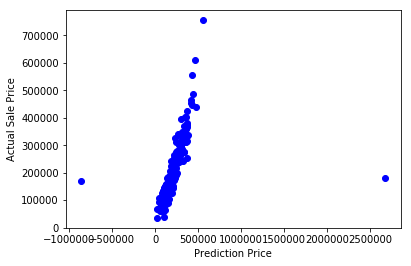

In [88]:
import matplotlib.pyplot as plt

prediction = linearReg.predict(testData)
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(prediction, testLabel, c = 'blue')

plt.xlabel("Prediction Price")
plt.ylabel("Actual Sale Price")

plt.show()

6. 比較將特徵值進行標準化前處理後之預測準確度

In [89]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
trainDataScaled = scaler.fit_transform(trainData.astype(np.float64))
linearReg.fit(trainDataScaled, trainLabel)
prediction = linearReg.predict(testData)
scaledDataLinearMse = mean_squared_error(testLabel, prediction)
print("non scaled data: ",linearMse)
print("scaled data: ",scaledDataLinearMse)


non scaled data:  17464303611.327114
scaled data:  6.225403996710166e+19


7. 利用相關係數選取特徵使用：

利用 pandas 套件中 dataframe 之函數 corr()找出各特徵之間的
相關係數，並利用 seaborn 套件之 heatmap()函數繪製。

MSSubClass              -0.084284
LotFrontage              0.334901
LotArea                  0.263843
OverallQual              0.790982
OverallCond             -0.077856
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.475241
BsmtFinSF1               0.386420
BsmtFinSF2              -0.011378
BsmtUnfSF                0.214479
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
LowQualFinSF            -0.025606
GrLivArea                0.708624
BsmtFullBath             0.227122
BsmtHalfBath            -0.016844
FullBath                 0.560664
HalfBath                 0.284108
BedroomAbvGr             0.168213
KitchenAbvGr            -0.135907
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageYrBlt              0.470177
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
EnclosedPorch 

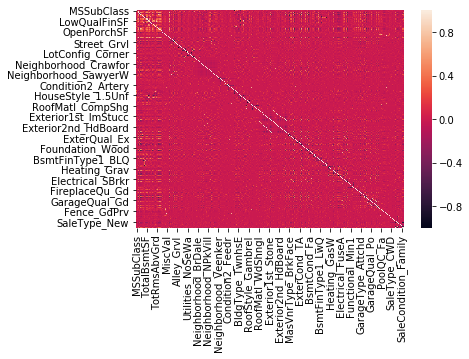

In [93]:
import seaborn as sns

corrMatrix = inputData.corr()
sns.heatmap(corrMatrix)
plt.show()

僅使用與房價最相關的前四高係數之特徵進行預測

In [95]:
sortedCorr = corrMatrix.sort_values(by="SalePrice", ascending=False)
top4List = sortedCorr.index[1:5] # return a list
linearReg.fit(trainData[top4List], trainLabel)
top4Score = linearReg.score(testData[top4List], testLabel)

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.475241
GarageYrBlt              0.470177
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
LotFrontage              0.334901
MasVnrType_Sto

僅使用與房價最相關的前四低係數之特徵進行預測

In [68]:
sortedCorr = corrMatrix.sort_values(by="SalePrice", ascending=True)
least4List = sortedCorr.index[0:4] # return a list
linearReg.fit(trainData[least4List], trainLabel)
least4Score = linearReg.score(testData[least4List], testLabel)

比較使用前四高、前四低及所有特徵三種狀況所得到預測準
確度的差異

In [99]:
linearReg.fit(trainData, trainLabel)

originalScore = linearReg.score(testData, testLabel)
print(testData)
print("前四高score: ",top4Score)
print("前四低score: ",least4Score)
print("所有特徵score: ",originalScore)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
892           20    70.000000     8414            6            8       1963   
1105          60    98.000000    12256            8            5       1994   
413           30    56.000000     8960            5            6       1927   
522           50    50.000000     5000            6            7       1947   
1036          20    89.000000    12898            9            5       2007   
614          180    21.000000     1491            4            6       1972   
218           50    70.049958    15660            7            9       1939   
1160         160    24.000000     2280            6            5       1978   
649          180    21.000000     1936            4            6       1970   
887           50    59.000000    16466            5            7       1955   
576           50    52.000000     6292            7            7       1928   
1252          20    62.000000     9858            5 

8. 利用 matplotlib 套件繪製特徵 GrLivArea 與房價 SalePrice 之散佈(scatter plot)圖，判斷是否有極端之 outliners，請將之移除後再比較預測準備度。

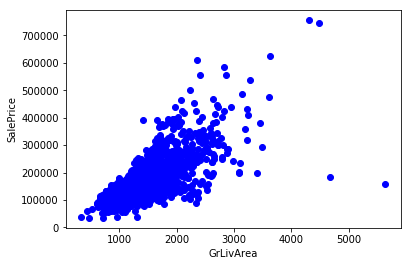

original score:  -1.5027327246712552
score of outlier remove:  1.0


In [70]:
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(data["GrLivArea"], label, c = 'blue')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
'''remove outlier'''
nonOutlierData = inputData.copy()
for index, row in inputData.iterrows():
    if row["GrLivArea"] > 3500:
        nonOutlierData = nonOutlierData.drop(index)
    elif row["SalePrice"] > 600000:  
        nonOutlierData = nonOutlierData.drop(index)
trainData, testData, trainLabel, testLabel = train_test_split(nonOutlierData, nonOutlierData["SalePrice"], test_size=0.3, random_state=42)   
linearReg.fit(trainData, trainLabel)
print("original score: ", originalScore)
print("score of outlier remove: ", linearReg.score(testData, testLabel))